# Lab | Random Forests
For this lab, you will be using the CSV files provided in the files_for_lab folder.

### Instructions
- Apply the Random Forests algorithm but this time only by upscaling the data using SMOTE.


Note that since SMOTE works on numerical data only, we will first encode the categorical variables in this case.

# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

# Load The Data

In [2]:
# Load numerical & categorical data
num_df = pd.read_csv("numerical.csv")
cat_df = pd.read_csv("categorical.csv")

In [3]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [4]:
# num_df.head()

# Encoding Categorical Data

- Since we will upsampling with SMOTE, we need to encode categorical data 
- Firstly, we will look inside the categorical data to check each variables. Because some of them might not need to encode

In [5]:
# cat_df.head()

In [6]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   STATE         95412 non-null  object
 1   CLUSTER       95412 non-null  int64 
 2   HOMEOWNR      95412 non-null  object
 3   GENDER        95412 non-null  object
 4   DATASRCE      95412 non-null  int64 
 5   RFA_2R        95412 non-null  object
 6   RFA_2A        95412 non-null  object
 7   GEOCODE2      95412 non-null  object
 8   DOMAIN_A      95412 non-null  object
 9   DOMAIN_B      95412 non-null  int64 
 10  ODATEW_YR     95412 non-null  int64 
 11  ODATEW_MM     95412 non-null  int64 
 12  DOB_YR        95412 non-null  int64 
 13  DOB_MM        95412 non-null  int64 
 14  MINRDATE_YR   95412 non-null  int64 
 15  MINRDATE_MM   95412 non-null  int64 
 16  MAXRDATE_YR   95412 non-null  int64 
 17  MAXRDATE_MM   95412 non-null  int64 
 18  LASTDATE_YR   95412 non-null  int64 
 19  LAST

- We have 22 columns in categorical data
- Some are already number as shown above as "int64"
- We will separate the int64 type into numerical data
- After then, we will encode only the object type into number

In [7]:
# Separate numeric and categoric columns
numeric_cat = cat_df.select_dtypes("number")
str_cat = cat_df.select_dtypes(exclude = "number")

# numeric_cat.head()
print(str_cat.head(), "\n")
print("Data shape: ", str_cat.shape)

  STATE HOMEOWNR GENDER RFA_2R RFA_2A GEOCODE2 DOMAIN_A
0    IL        H      F      L      E        C        T
1    CA        H      M      L      G        A        S
2    NC        U      M      L      E        C        R
3    CA        U      F      L      E        C        R
4    FL        H      F      L      F        A        S 

Data shape:  (95412, 7)


In [8]:
# Encoding the categorical data into number

encoder = OneHotEncoder(handle_unknown="ignore", drop="first").fit(str_cat)
encoded = encoder.transform(str_cat).toarray()
cat_encoded = pd.DataFrame(encoded)
cat_encoded.columns = encoder.get_feature_names_out()
cat_encoded.head()

,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_U,GENDER_M,GENDER_other,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
# Concat all columns into one data frame

df = pd.concat([cat_encoded, numeric_cat, num_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Columns: 354 entries, STATE_FL to CLUSTER2
dtypes: float64(33), int64(321)
memory usage: 257.7 MB


In [10]:
X = df

In [11]:
# Download the target

y = pd.read_csv("target.csv")
y.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


- In this lab, we want to work on imbalanced data using SMOTE technique
- Therefore, we will work on TARGET_B as our target column

In [12]:
# Get only TARGET_D as our target
y = y[["TARGET_B"]]
# y.head()

TARGET_B
0           90569
1            4843
dtype: int64


Text(0, 0.5, 'Count')

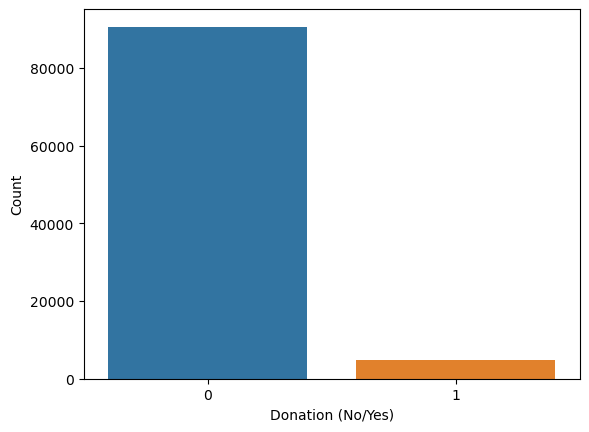

In [13]:
# Check the target 
print(y.value_counts())

sns.countplot(y.TARGET_B)
plt.xlabel("Donation (No/Yes)")
plt.ylabel("Count")


- We see imbalanced data
- Therefore, we will use SMOTE technique to work on the imbalanced data

# SMOTE Upsampling Technique

In [14]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# print(len(X_train))
print("y_train (N rows):", len(y_train))

y_train (N rows): 71559


Sample after SMOTE (N rows): 
 TARGET_B
0           67905
1           67905
dtype: int64 

Sample before SMOTE (N rows): 
 TARGET_B
0           67905
1            3654
dtype: int64 



Text(0, 0.5, 'Count')

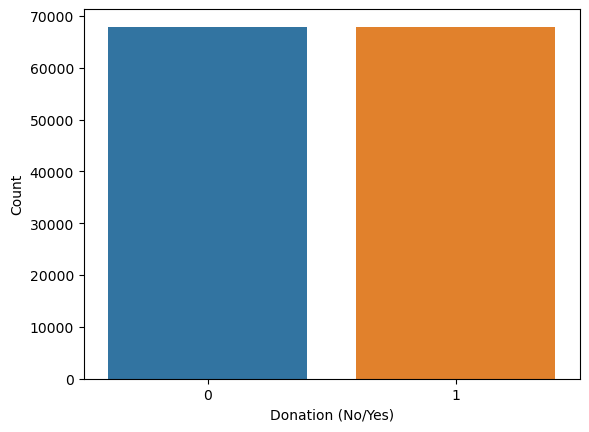

In [15]:
# Oversampling with SMOTE
sm = SMOTE(random_state = 42)
X_train_smt, y_train_smt = sm.fit_resample(X_train, y_train)
print("Sample after SMOTE (N rows):", "\n", y_train_smt.value_counts(), "\n")
print("Sample before SMOTE (N rows):", "\n", y_train.value_counts(), "\n")

sns.countplot(y_train_smt.TARGET_B)
plt.xlabel("Donation (No/Yes)")
plt.ylabel("Count")

# Random Forest - Baseline Model

In [16]:
# Define function for apllying different model

def fitting_model(model_x_condition, X_train, y_train):
    
    # setup and train the model
    model = model_x_condition.fit(X_train,y_train) 
    
    # predict the y_pred (predictions)
    predictions = model.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, predictions))

    # Visualze
    cm = confusion_matrix(y_test, predictions)

    # plot the confusion matrix as a heatmap
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Response')
    plt.ylabel('True Response')
    plt.xticks([0,1], ['No', 'Yes'])
    plt.yticks([0,1], ['No', 'Yes'])

    # add the values of the confusion matrix to the heatmap
    thresh = cm.max() / 2.
    for i, j in ((0, 0), (0, 1), (1, 0), (1, 1)):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.show()
    


 Random Forest - Baseline Model: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22664
           1       0.00      0.00      0.00      1189

    accuracy                           0.95     23853
   macro avg       0.48      0.50      0.49     23853
weighted avg       0.90      0.95      0.93     23853



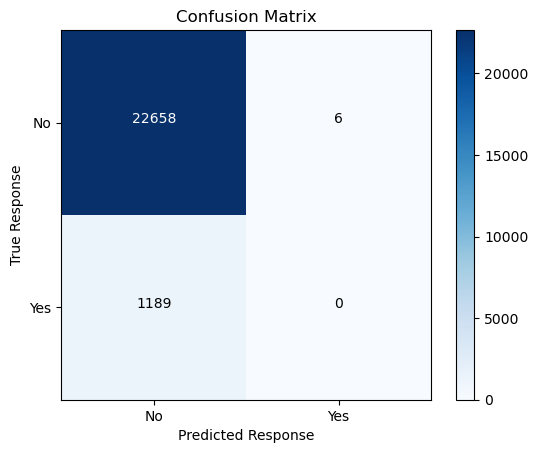

In [17]:
# Calling the RandomForest as a baseline model
print("\n", "Random Forest - Baseline Model:", "\n")
fitting_model(RandomForestClassifier(random_state = 42), X_train, y_train)

# Random Forest - SMOTE

Random Forest - SMOTE: 

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22664
           1       0.00      0.00      0.00      1189

    accuracy                           0.95     23853
   macro avg       0.48      0.50      0.49     23853
weighted avg       0.90      0.95      0.93     23853



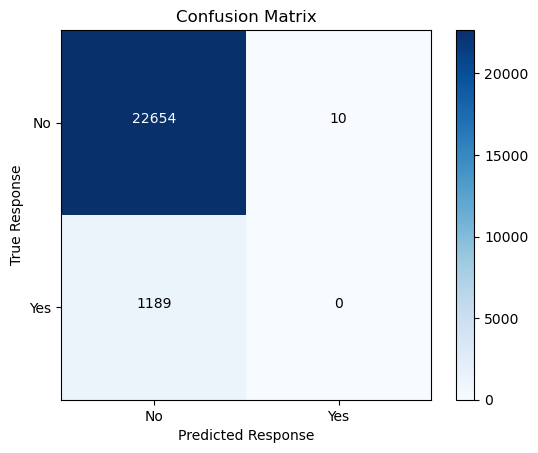

In [18]:
# Calling the RandomForest after SMOTE technoque
print("Random Forest - SMOTE:", "\n")
fitting_model(RandomForestClassifier(random_state = 42), X_train_smt, y_train_smt)


# Result

- **Both baseline and random forest models are able to predict only the "No (0)" class**. 
- **Even though we did the Oversampling technique using SMOTE, the Random Forest model was not improved in predicting another class at all**.

**Possibles reasons**:
- We skipped the features selection/engineering process. Including all columns from the whole dataset in the feature is not ideal. 

**Further steps**:
- We could get back to the very first step --> feature selection before predicting the model
- We could also try other ML algorithms apart from Random Forest


**Observe**
- If we do the resampling with the whole dataset, the model get improved & seems to predict pretty well for both classes.
- My opinion, resamling the whole dataset means data leak. So I resampled only the training set. 

**Note**: 
- I noticed that I used a different dataset than my classmate for this lab. 
- This dataset contains > 300 columns, which means it needs more steps to work on the feature selection/engineering part. (For this lab I didn't go over those steps). 

- I might get back to work on this later.




In [19]:
#### THANK YOU 💖 ####

#### Read more about random_state in Random Forest

- [What is random_state?](https://medium.com/mlearning-ai/what-the-heck-is-random-state-24a7a8389f3d)